# Analyze song syllable sequence

- Get results from syllable_sequence.py
- Read from song_sequence table

<img src="img/syllable_sequence.png" width=500 height=500/>

In [47]:
from deafening.plot import plot_across_days, plot_bar_comparison, plot_paired_data, plot_per_day_block
from database.load import ProjectLoader
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from util import save
from util.stats import two_sample_ttest, paired_ttest, rank_sum_test, signed_rank_test
import warnings
warnings.filterwarnings("ignore")

In [48]:
# Load database
nb_bout_crit = 10
db = ProjectLoader().load_db()
df = db.to_dataframe(f"""SELECT song_sequence.*, song.taskSessionDeafening, song.block10days
                FROM song_sequence INNER JOIN song ON song.id = song_sequence.songID WHERE song_sequence.nbBoutsUndir >= {nb_bout_crit}""")
df['block10days'].replace(4, 3, inplace=True)  # include block 4 into block 3

In [49]:
df
len(df)

76

## Transition entropy (all syllable types)

- Higher the value, the syllable sequence becomes more variable
- Stop syllable (*) also used in this calculation <br /><br />

In [50]:
# Parameters
fig_ext = '.png'
save_fig= False  # save figure to disk
save_path = save.make_dir(ProjectLoader().path / 'Analysis', 'SequenceAnalysis', add_date=False)

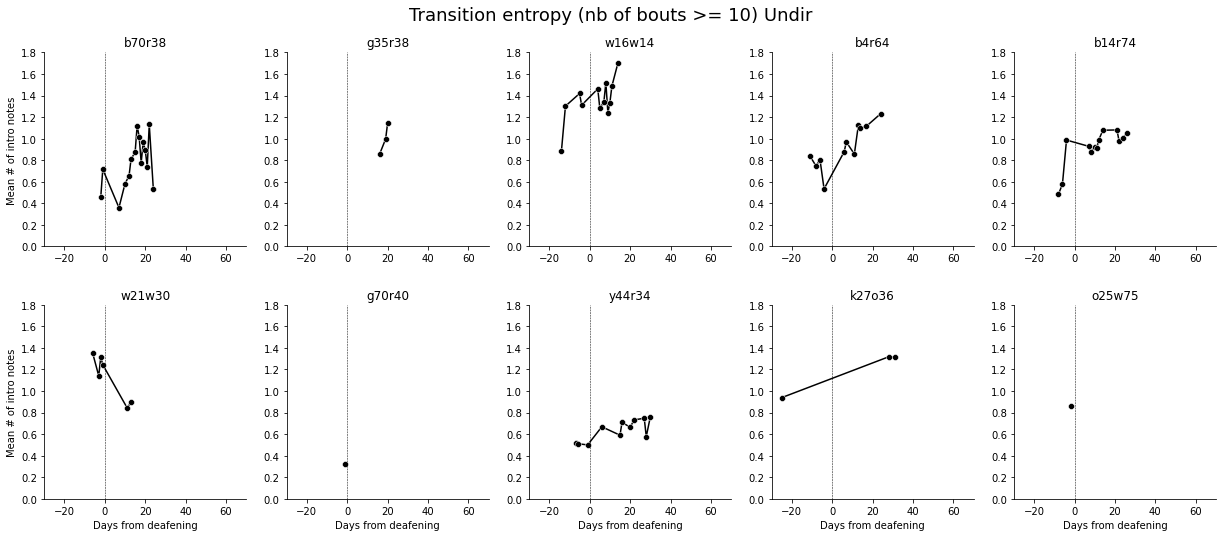

In [51]:
# Transition entropy
plot_across_days(df, x='taskSessionDeafening', y='transEntUndir', 
                 title=f"Transition entropy (nb of bouts >= {nb_bout_crit}) Undir",
                 x_lim=[-30, 70],
                 y_lim=[0, 1.8],
                 x_label='Days from deafening', y_label='Mean # of intro notes',
                 fig_ext=fig_ext,
                 save_path=save_path,
                 save_fig=save_fig)

## Sequence linearity & sequence consistency (Scharff & Nottebohm 1991)




- A value closer to 1 indicates more stereotyped linearity or consistency of the syllable sequence<br />


\begin{equation}
sequence\ linearity = \frac{(number\ of\ unique\ syllables )}{(number\ of\ unique\ transitions\ )}
\end{equation}<br />



\begin{equation}
sequence\ consistency = \frac{(number\ of\ typical\ transitions )}{(total\ number\ of\ possible\ transitions\ )}
\end{equation}<br />


\begin{equation}
song\ stereotypy = \frac{sequence\ linearity + sequency\ consistency}{2}
\end{equation}<br />

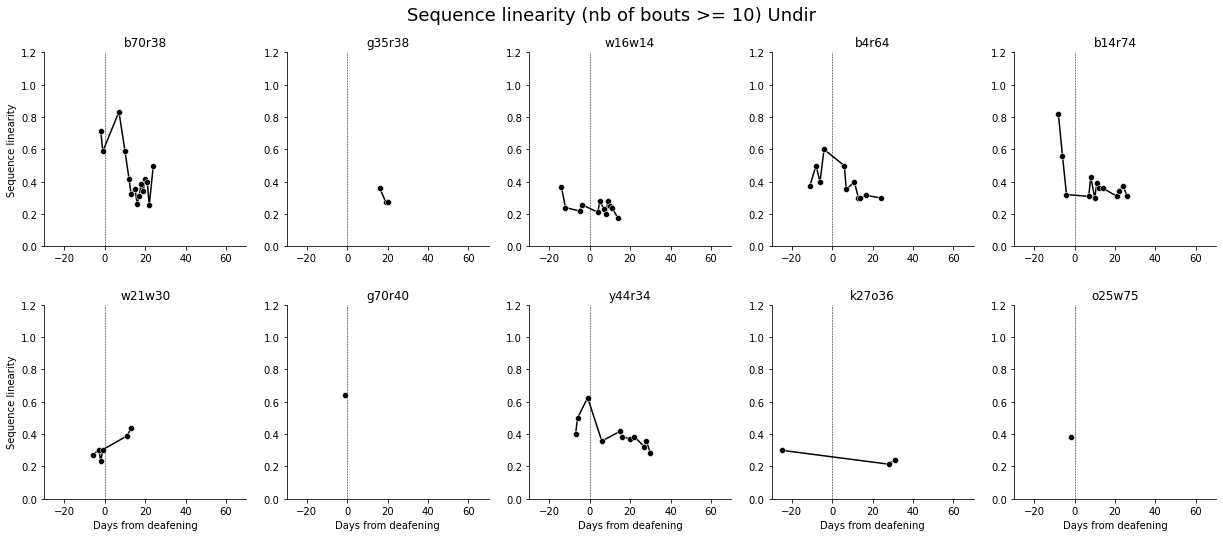

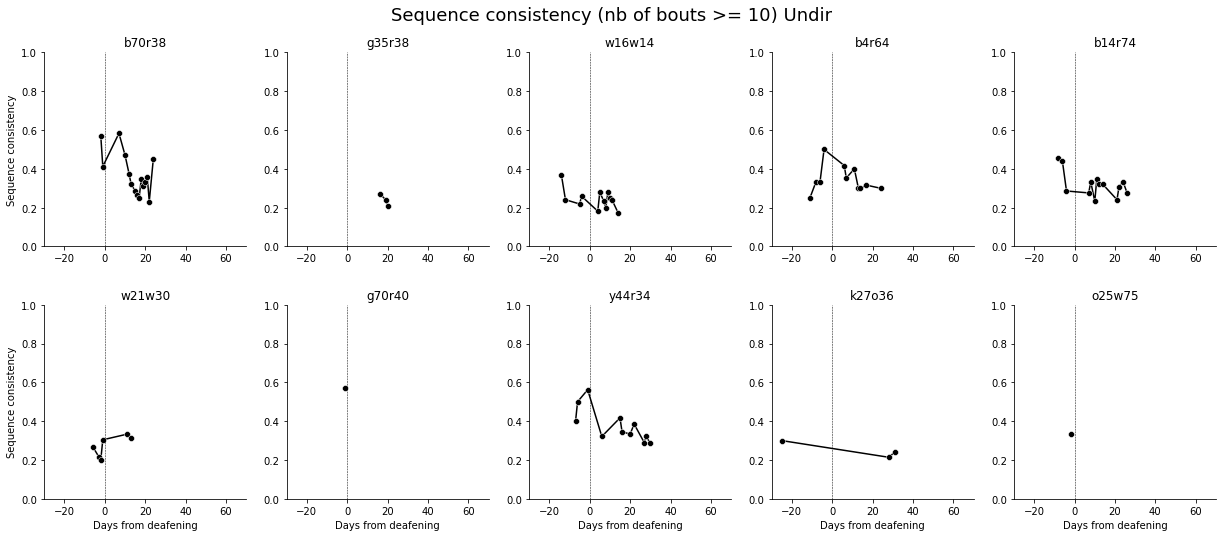

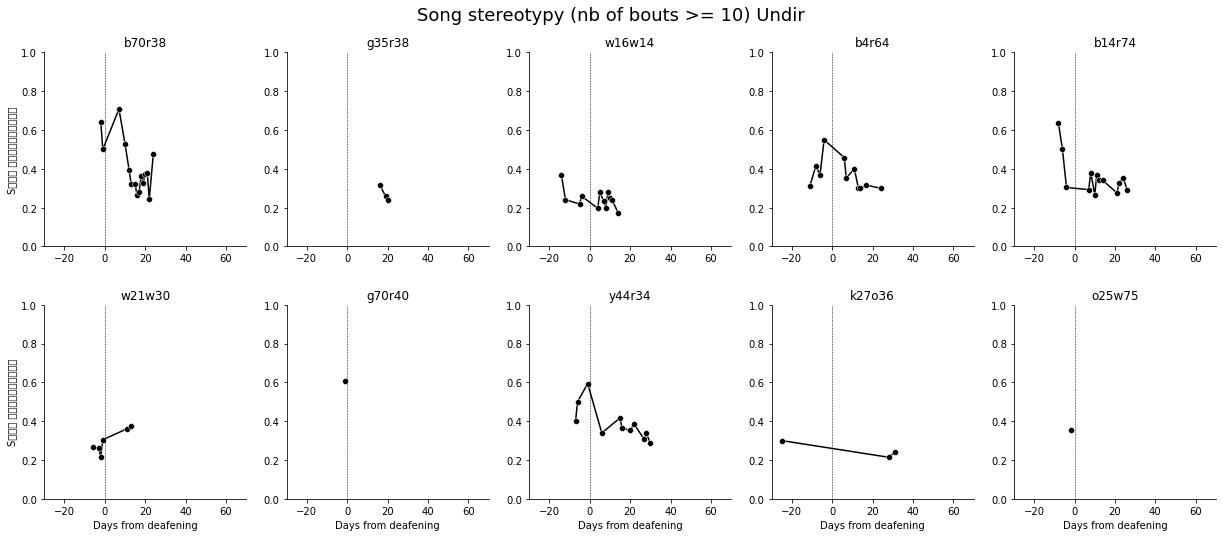

In [52]:
# Sequence linearity
plot_across_days(df, x='taskSessionDeafening', y='seqLinearityUndir', 
                 title=f"Sequence linearity (nb of bouts >= {nb_bout_crit}) Undir",
                 x_lim=[-30, 70],
                 y_lim=[0, 1.2],
                 x_label='Days from deafening', y_label='Sequence linearity',
                 fig_ext=fig_ext,
                 save_path=save_path,
                 save_fig=save_fig)

# Sequence consistency
plot_across_days(df, x='taskSessionDeafening', y='seqConsistencyUndir', 
                 title=f"Sequence consistency (nb of bouts >= {nb_bout_crit}) Undir",
                 x_lim=[-30, 70],
                 y_lim=[0, 1],
                 x_label='Days from deafening', y_label='Sequence consistency',
                 fig_ext=fig_ext,
                 save_path=save_path,
                 save_fig=save_fig)

# S𝑜𝑛𝑔 𝑠𝑡𝑒𝑟𝑒𝑜𝑡𝑦𝑝𝑦
plot_across_days(df, x='taskSessionDeafening', y='songStereotypyUndir', 
                 title=f"Song stereotypy (nb of bouts >= {nb_bout_crit}) Undir",
                 x_lim=[-30, 70],
                 y_lim=[0, 1],
                 x_label='Days from deafening', y_label='S𝑜𝑛𝑔 𝑠𝑡𝑒𝑟𝑒𝑜𝑡𝑦𝑝𝑦',
                 fig_ext=fig_ext,
                 save_path=save_path,
                 save_fig=save_fig)

## Pre vs. Post

### Transition Entropy

In [53]:
from deafening.functions import get_pre_post_mean_per_bird
df_mean = get_pre_post_mean_per_bird(df, 'transEntUndir')
df_mean
df_dropna = df_mean.dropna()  # remove if any of the columns is nan, used for paired comparisons
df_dropna

taskName,Predeafening,Postdeafening
birdID,,
b14r74,0.683000,0.983000
b4r64,0.731500,1.039571
b70r38,0.588000,0.805231
k27o36,0.938000,1.314500
w16w14,1.228500,1.421375
w21w30,1.262250,0.869500
y44r34,0.510333,0.680750


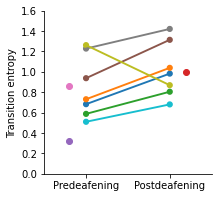

t(15) = -1.601251, p = 0.130 (two-sample t-test)
t(6) = -1.720, p = 0.136 (paired t-test)
Z = -1.636, p = 0.102 (rank-sum test)
Z = 7.0, p = 0.297 (signed-rank test)


In [54]:
# Transition entropy
plot_paired_data(df, x='taskName', y='transEntUndir',
                 y_label='Transition entropy',
                 y_lim=[0, 1.6],
                 fig_size=(3, 3),
                 fig_name=f"Transition entropy (nb of bouts >= {nb_bout_crit}) Undir",
                 save_fig=False,
                 save_path=save_path,
                 color_by_bird=True,  # color-label birds
                 fig_ext='.png'
                 )
# Run stats
df_dropna = df_mean.dropna()  # remove if any of the columns is nan, used for paired comparisons

_, _, msg = two_sample_ttest(df_mean['Predeafening'].values, df_mean['Postdeafening'].values)
print(msg + " (two-sample t-test)")
_, _, msg = paired_ttest(df_dropna['Predeafening'].values, df_dropna['Postdeafening'].values)
print(msg + " (paired t-test)")
_, _, msg = rank_sum_test(df_mean['Predeafening'].values, df_mean['Postdeafening'].values)
print(msg + " (rank-sum test)")
_, _, msg = signed_rank_test(df_dropna['Predeafening'].values, df_dropna['Postdeafening'].values)
print(msg + " (signed-rank test)")

### Sequence linearity

In [55]:
df_mean = get_pre_post_mean_per_bird(df, 'seqLinearityUndir')
df_mean
df_dropna = df_mean.dropna()  # remove if any of the columns is nan, used for paired comparisons
df_dropna

taskName,Predeafening,Postdeafening
birdID,,
b14r74,0.567000,0.349100
b4r64,0.468750,0.352714
b70r38,0.651000,0.415077
k27o36,0.300000,0.227000
w16w14,0.271750,0.233875
w21w30,0.277500,0.413500
y44r34,0.508333,0.360000


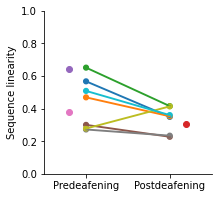

t(15) =  2.037339, p = 0.060 (two-sample t-test)
t(6) = 2.079, p = 0.083 (paired t-test)
Z =  1.540, p = 0.124 (rank-sum test)
Z = 4.0, p = 0.109 (signed-rank test)


In [56]:
# Sequence linearity
plot_paired_data(df, x='taskName', y='seqLinearityUndir',
                 y_label='Sequence linearity',
                 y_lim=[0, 1],
                 fig_size=(3, 3),
                 fig_name=f"Sequence linearity (nb of bouts >= {nb_bout_crit}) Undir",
                 save_fig=False,
                 save_path=save_path,
                 color_by_bird=True,  # color-label birds
                 fig_ext='.png'
                 )
# Run stats
df_dropna = df_mean.dropna()  # remove if any of the columns is nan, used for paired comparisons

_, _, msg = two_sample_ttest(df_mean['Predeafening'].values, df_mean['Postdeafening'].values)
print(msg + " (two-sample t-test)")
_, _, msg = paired_ttest(df_dropna['Predeafening'].values, df_dropna['Postdeafening'].values)
print(msg + " (paired t-test)")
_, _, msg = rank_sum_test(df_mean['Predeafening'].values, df_mean['Postdeafening'].values)
print(msg + " (rank-sum test)")
_, _, msg = signed_rank_test(df_dropna['Predeafening'].values, df_dropna['Postdeafening'].values)
print(msg + " (signed-rank test)")

### Sequence consistency

In [57]:
df_mean = get_pre_post_mean_per_bird(df, 'seqConsistencyUndir')
df_mean
df_dropna = df_mean.dropna()  # remove if any of the columns is nan, used for paired comparisons
df_dropna

taskName,Predeafening,Postdeafening
birdID,,
b14r74,0.393000,0.298800
b4r64,0.354000,0.340857
b70r38,0.491500,0.352385
k27o36,0.300000,0.227000
w16w14,0.271750,0.230125
w21w30,0.247500,0.322500
y44r34,0.487333,0.337375


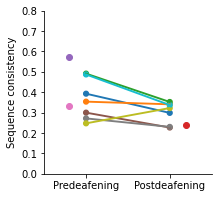

t(15) =  2.070728, p = 0.056 (two-sample t-test)
t(6) = 2.116, p = 0.079 (paired t-test)
Z =  1.828, p = 0.068 (rank-sum test)
Z = 4.0, p = 0.109 (signed-rank test)


In [58]:
# Sequence consistency
plot_paired_data(df, x='taskName', y='seqConsistencyUndir',
                 y_label='Sequence consistency',
                 y_lim=[0, 0.8],
                 fig_size=(3, 3),
                 fig_name=f"Sequence consistency (nb of bouts >= {nb_bout_crit}) Undir",
                 save_fig=False,
                 save_path=save_path,
                 color_by_bird=True,  # color-label birds
                 fig_ext='.png'
                 )
# Run stats
df_dropna = df_mean.dropna()  # remove if any of the columns is nan, used for paired comparisons

_, _, msg = two_sample_ttest(df_mean['Predeafening'].values, df_mean['Postdeafening'].values)
print(msg + " (two-sample t-test)")
_, _, msg = paired_ttest(df_dropna['Predeafening'].values, df_dropna['Postdeafening'].values)
print(msg + " (paired t-test)")
_, _, msg = rank_sum_test(df_mean['Predeafening'].values, df_mean['Postdeafening'].values)
print(msg + " (rank-sum test)")
_, _, msg = signed_rank_test(df_dropna['Predeafening'].values, df_dropna['Postdeafening'].values)
print(msg + " (signed-rank test)")

### Song stereotypy

In [59]:
df_mean = get_pre_post_mean_per_bird(df, 'songStereotypyUndir')
df_mean
df_dropna = df_mean.dropna()  # remove if any of the columns is nan, used for paired comparisons
df_dropna

taskName,Predeafening,Postdeafening
birdID,,
b14r74,0.48000,0.324100
b4r64,0.41150,0.346714
b70r38,0.57150,0.383692
k27o36,0.30000,0.227000
w16w14,0.27175,0.232000
w21w30,0.26275,0.368000
y44r34,0.49800,0.348625


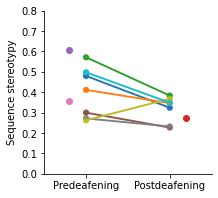

t(15) =  2.097337, p = 0.053 (two-sample t-test)
t(6) = 2.166, p = 0.073 (paired t-test)
Z =  1.636, p = 0.102 (rank-sum test)
Z = 4.0, p = 0.109 (signed-rank test)


In [60]:
# Sequence stereotypy
plot_paired_data(df, x='taskName', y='songStereotypyUndir',
                 y_label='Sequence stereotypy',
                 y_lim=[0, 0.8],
                 fig_size=(3, 3),
                 fig_name=f"Sequence stereotypy (nb of bouts >= {nb_bout_crit}) Undir",
                 save_fig=False,
                 save_path=save_path,
                 color_by_bird=True,  # color-label birds
                 fig_ext='.png'
                 )
# Run stats
df_dropna = df_mean.dropna()  # remove if any of the columns is nan, used for paired comparisons

_, _, msg = two_sample_ttest(df_mean['Predeafening'].values, df_mean['Postdeafening'].values)
print(msg + " (two-sample t-test)")
_, _, msg = paired_ttest(df_dropna['Predeafening'].values, df_dropna['Postdeafening'].values)
print(msg + " (paired t-test)")
_, _, msg = rank_sum_test(df_mean['Predeafening'].values, df_mean['Postdeafening'].values)
print(msg + " (rank-sum test)")
_, _, msg = signed_rank_test(df_dropna['Predeafening'].values, df_dropna['Postdeafening'].values)
print(msg + " (signed-rank test)")

## Plot across day blocks

In [61]:
save_fig = False
fig_ext = '.png'
df_block = df.groupby(['birdID', 'block10days'])[['transEntUndir', 'seqLinearityUndir', 'seqConsistencyUndir', 'songStereotypyUndir']].mean().reset_index()  
df_block.dropna(inplace=True)
df_block

,birdID,block10days,transEntUndir,seqLinearityUndir,seqConsistencyUndir,songStereotypyUndir
0,b14r74,0,0.683000,0.567000,0.393000,0.480000
1,b14r74,1,0.909000,0.346333,0.280667,0.313667
2,b14r74,2,0.994000,0.370333,0.329333,0.350000
3,b14r74,3,1.030250,0.335250,0.289500,0.312500
4,b4r64,0,0.731500,0.468750,0.354000,0.411500
5,b4r64,1,0.925000,0.426500,0.385000,0.405500
6,b4r64,2,1.049000,0.329000,0.329000,0.329000
7,b4r64,3,1.231000,0.300000,0.300000,0.300000
8,b70r38,0,0.588000,0.651000,0.491500,0.571500
9,b70r38,1,0.471000,0.710500,0.527000,0.618500


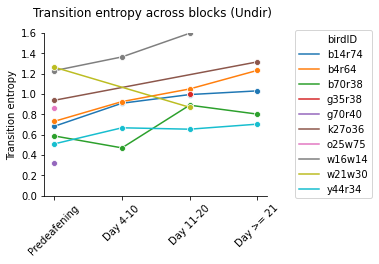

F = 0.935, p = 0.441 (One-way ANOVA)


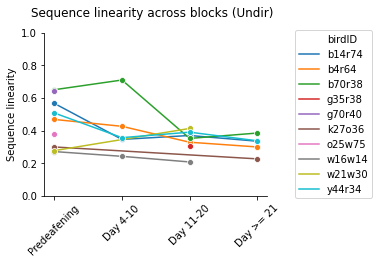

F = 1.742, p = 0.188 (One-way ANOVA)


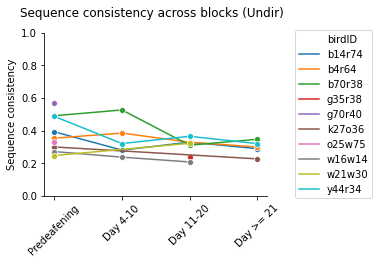

F = 1.552, p = 0.229 (One-way ANOVA)


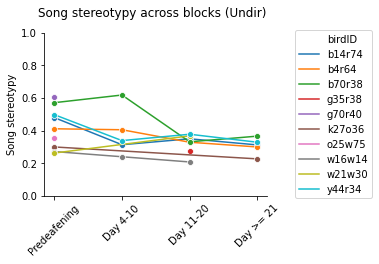

F = 1.713, p = 0.194 (One-way ANOVA)


In [62]:
def plot_across_blocks(df_block, variable, 
                       y_lim=None, fig_size=(4, 3),
                       y_label=None, 
                       fig_name=None, 
                       save_fig=False, save_path=None, 
                       fig_ext='.png'
                       ):
    
    from util.draw import remove_right_top
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    plt.suptitle(fig_name, y=1, fontsize=12)
    sns.lineplot('block10days', variable, hue='birdID', marker='o', data=df_block, ax=ax)
    remove_right_top(ax)
    ax.set_xlabel(''), ax.set_ylabel(y_label)
    ax.set_ylim(y_lim)
    day_block_label_list = ['Predeafening', 'Day 4-10', 'Day 11-20', 'Day >= 21']
    ax.set_xticklabels(day_block_label_list, rotation=45)
    ax.set_xticklabels(day_block_label_list, rotation=45)
    ax.set_xticks([0, 1, 2, 3])
    ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

    # Run one-way ANOVA
    import scipy.stats as stats
    f_val, p_val = stats.f_oneway(
                                  df_block[variable][df_block['block10days'] == 0],
                                  df_block[variable][df_block['block10days'] == 1],
                                  df_block[variable][df_block['block10days'] == 2],
                                  df_block[variable][df_block['block10days'] == 3],
                                  )

    msg = f"""F ={f_val: 0.3f}, p ={p_val: 0.3f} (One-way ANOVA)"""
    if save_fig:
        save.save_fig(fig, save_path, fig_name, view_folder=view_folder, fig_ext=fig_ext)
    else:
        plt.show()
    print(msg)  

# Transition entropy
plot_across_blocks(df_block, variable='transEntUndir', 
                   fig_name='Transition entropy across blocks (Undir)',
                   y_lim=[0, 1.6], 
                   y_label='Transition entropy', 
                   save_fig=save_fig, fig_ext=fig_ext
                   )

# Sequence linearity
plot_across_blocks(df_block, variable='seqLinearityUndir', 
                   fig_name='Sequence linearity across blocks (Undir)',
                   y_lim=[0, 1], 
                   y_label='Sequence linearity', 
                   save_fig=save_fig, fig_ext=fig_ext
                   )

# Sequence consistency
plot_across_blocks(df_block, variable='seqConsistencyUndir', 
                   fig_name='Sequence consistency across blocks (Undir)',
                   y_lim=[0, 1], 
                   y_label='Sequence consistency', 
                   save_fig=save_fig, fig_ext=fig_ext
                   )

# Song stereotypy
plot_across_blocks(df_block, variable='songStereotypyUndir', 
                   fig_name='Song stereotypy across blocks (Undir)',
                   y_lim=[0, 1], 
                   y_label='Song stereotypy', 
                   save_fig=save_fig, fig_ext=fig_ext
                   )